In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.stats as sc
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec

In [5]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Intercept    1.957909
x1           1.615368
x2           0.942777
dtype: float64
            df     sum_sq    mean_sq          F        PR(>F)
x1         1.0  31.677517  31.677517  38.500727  1.347395e-08
x2         1.0   1.058819   1.058819   1.286884  2.594186e-01
Residual  97.0  79.809382   0.822777        NaN           NaN


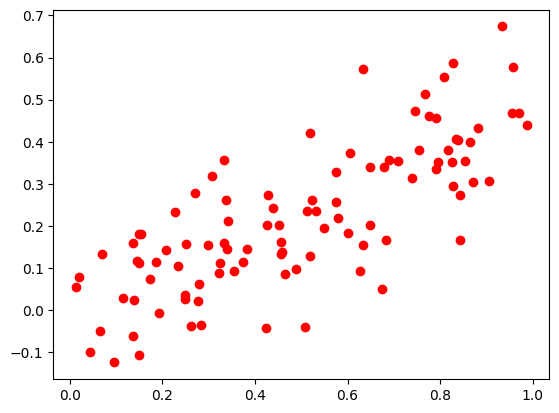

In [6]:
formula = "y ~ x1 + x2"
plt.scatter(x1, x2, color='red')
df = pd.DataFrame({"y":y, "x1":x1, "x2":x2})
model = ols(formula, df).fit()
print(model.params) #x1 and x2 are collinear, coefficient for x1 is smaller, coefficient for x2 is significantly bigger
print(anova_lm(model))
#Usually H:x_1 = 0 or H:x_2 = 0 will hold (alpha = 0.05)

Intercept    1.937090
x1           2.077062
dtype: float64
Intercept    3.605074e-17
x1           1.367829e-08
dtype: float64


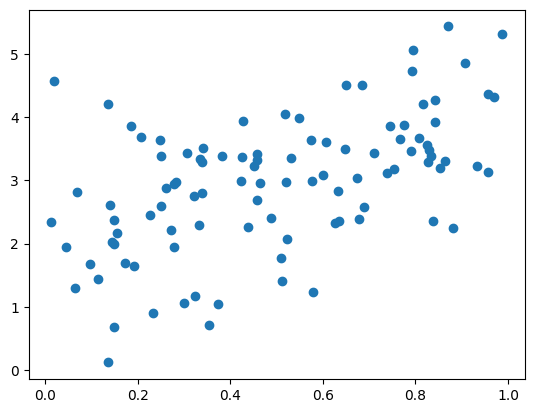

In [7]:
formula = "y ~ x1"
df = pd.DataFrame({"y":y, "x1":x1})
model = ols(formula, df).fit()
print(model.params)
print(model.pvalues) #We reject H_x1 = 0
plt.scatter(x1, y)

Intercept    2.323890
x2           2.910323
dtype: float64
Intercept    2.262620e-27
x2           7.429581e-07
dtype: float64


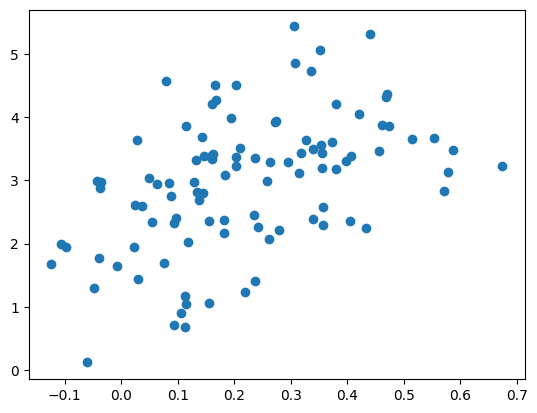

In [8]:
formula = "y ~ x2"
df = pd.DataFrame({"y":y, "x2":x2})
model = ols(formula, df).fit()
print(model.params)
print(model.pvalues) #We reject H_x2 = 0
plt.scatter(x2, y)

In [9]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]]) #Adding a new point

In [ ]:
def hat_matrix(x):
    h_m = np.dot(x, np.linalg.inv( np.dot(x.T, x) ) )
    h_m = np.dot(h_m, x.T)

    infl = np.diag(h_m)
    sum, n = infl.sum(), len(infl) #or np.trace(h_m)

    return df.index[infl > sum * 2 / n]

df = load_data("Boston")
hat_matrix(df)

Index([  8,  48, 120, 121, 122, 123, 124, 125, 126, 142, 147, 148, 152, 154,
       155, 162, 163, 166, 203, 204, 209, 214, 283, 342, 353, 364, 365, 367,
       368, 369, 370, 371, 372, 374, 380, 405, 410, 412, 414, 418, 488, 489,
       490, 491, 492],
      dtype='int64')

Intercept    2.061791
x1           0.857545
x2           2.266323
dtype: float64


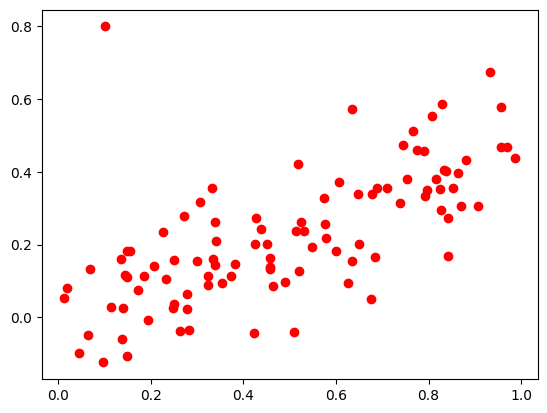

In [11]:
formula = "y ~ x1 + x2" #New point is an outlier with high leverage (big residual, unusual values for x_2 and y)
plt.scatter(x1, x2, color='red')
df = pd.DataFrame({"y":y, "x1":x1, "x2":x2})
model = ols(formula, df).fit()
print(model.params)

In [12]:
formula = "y ~ x1" #New point will be an outlier with small leverage (x_1=0.1 is nothing special, but residual is high)
df = pd.DataFrame({"y":y, "x1":x1})
model = ols(formula, df).fit()
print(model.params)
print(model.pvalues)

Intercept    2.073941
x1           1.876046
dtype: float64
Intercept    2.309552e-17
x1           9.232533e-07
dtype: float64


Intercept    2.284012
x2           3.145849
dtype: float64


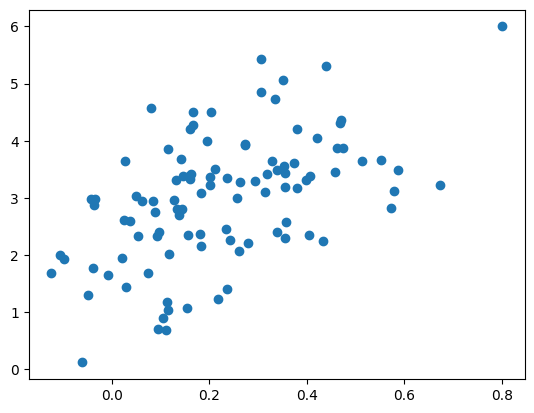

In [13]:
formula = "y ~ x2" #New point will be an outlier with high leverage (big residual and value of x_2)
df = pd.DataFrame({"y":y, "x2":x2})
model = ols(formula, df).fit()
print(model.params)
plt.scatter(x2, y)

In [14]:
df = load_data("Boston")
print(df.shape)
print(df.head(2))

(506, 13)
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  


In [15]:
pvals = []
params = []
for i in df.columns:
    if i == 'crim':
        continue
    formula = "crim ~ " + i
    model = ols(formula, df[0:400]).fit()
    print("R", model.rsquared, "pval", model.pvalues.iloc[1])
    pvals.append(model.pvalues.iloc[1])
    params.append(model.params.iloc[1])


R 0.02502423370454787 pval 0.0015039715676271796
R 0.12389243049139986 pval 4.137766489750793e-13
R 2.7248867218720996e-05 pval 0.9171099244971264
R 0.14244349044548288 pval 5.468685908307994e-15
R 0.027930308410562654 pval 0.000791809594761
R 0.08415073097565107 pval 3.3967704858944664e-09
R 0.10388601094582728 pval 4.025554320234636e-11
R 0.39507044800538393 pval 2.2961324739977558e-45
R 0.3343710380448617 pval 4.57810719186989e-37
R 0.0411553625893506 pval 4.365402445913287e-05
R 0.14652031939518073 pval 2.0898277895457193e-15
R 0.07051540763199671 pval 6.990153291027212e-08


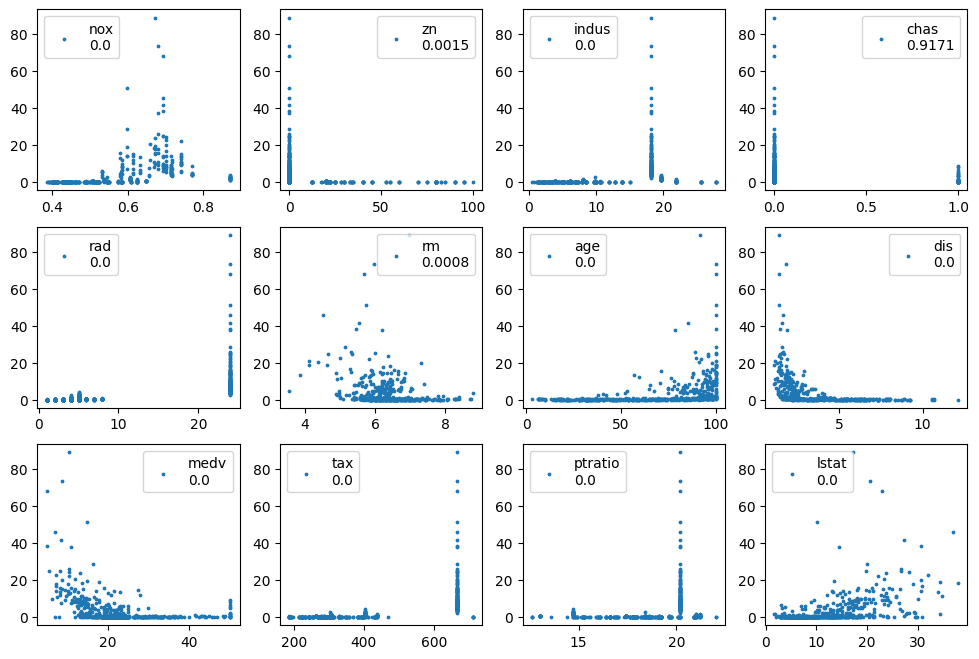

In [16]:
fig, ax = plt.subplots(3, 4, figsize=(12, 8))
for i in range (1, len(df.columns) ):
    ax[(i - 1) // 4][i % 4].scatter(df[ df.columns[i] ], df['crim'], s = 3, label = df.columns[i] + "\n" + str(round(pvals[i - 1], 4) ) )
    ax[(i - 1) // 4][i % 4].legend()
plt.legend()

In [17]:
formula = "crim ~ " + " + ".join(df.columns[1:]) #Using alpha = 0.05
model = ols(formula, df).fit()
print(model.pvalues)

Intercept    5.227089e-02
zn           1.534403e-02
indus        4.857094e-01
chas         4.858406e-01
nox          6.036986e-02
rm           3.007385e-01
age          9.623231e-01
dis          3.725942e-04
rad          8.588123e-12
tax          4.657565e-01
ptratio      1.033932e-01
lstat        6.739844e-02
medv         2.605302e-04
dtype: float64


Text(0, 0.5, 'Multiple Regression Coefficients')

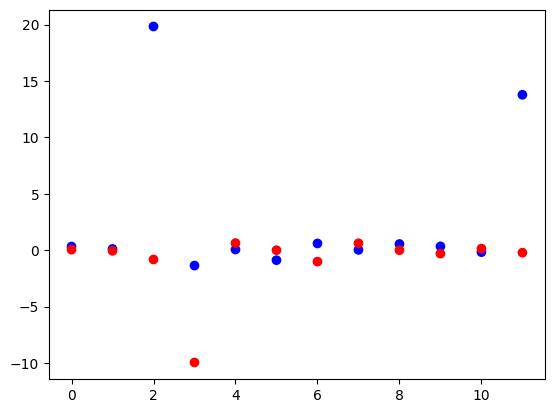

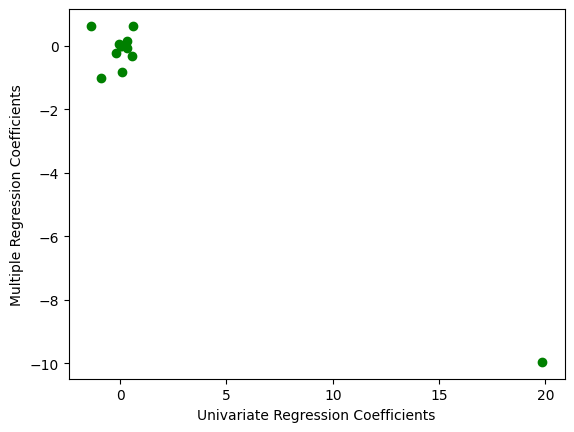

In [18]:
x_axis = np.linspace(0, len(params) - 1, len(params))
x_axis = np.concatenate( (x_axis, x_axis) )
multi = model.params
multi = np.array(np.reshape(multi, (1, -1)))
y_axis = np.concatenate( (params[1:], multi[0]) )
cols = np.concatenate( (['blue'] * len(params), ['red'] * len(params)))

plt.scatter(x_axis, y_axis, c = cols) #Uni - blue, multi - red, fun way to check collinearity
fig, ax = plt.subplots()
plt.scatter(params, multi[0][1:], c = 'green')
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")

In [19]:

for i in df.columns:
    if i == 'crim':
        continue
    formula = "crim ~ "

    for j in range(1, 4):
        formula = formula + f"I({i} ** {j}) + "
    formula = formula[0:len(formula) - 2]
    model = ols(formula, df[0:400]).fit()
    
    print(model.pvalues)
    

Intercept     6.569588e-12
I(zn ** 1)    3.472622e-02
I(zn ** 2)    2.445137e-01
I(zn ** 3)    4.079278e-01
dtype: float64
Intercept        1.066808e-02
I(indus ** 1)    4.866526e-05
I(indus ** 2)    1.005565e-08
I(indus ** 3)    7.735897e-10
dtype: float64
Intercept       5.261704e-08
I(chas ** 1)    9.171099e-01
I(chas ** 2)    9.171099e-01
I(chas ** 3)    9.171099e-01
dtype: float64
Intercept      2.945106e-12
I(nox ** 1)    1.547759e-13
I(nox ** 2)    1.081406e-14
I(nox ** 3)    2.482308e-15
dtype: float64
Intercept     0.005209
I(rm ** 1)    0.020914
I(rm ** 2)    0.053883
I(rm ** 3)    0.106343
dtype: float64
Intercept      0.533561
I(age ** 1)    0.260494
I(age ** 2)    0.104184
I(age ** 3)    0.025347
dtype: float64
Intercept      2.705353e-23
I(dis ** 1)    3.207637e-15
I(dis ** 2)    6.014788e-11
I(dis ** 3)    2.629015e-08
dtype: float64
Intercept      0.651015
I(rad ** 1)    0.469967
I(rad ** 2)    0.456369
I(rad ** 3)    0.309414
dtype: float64
Intercept      0.442724
I(ta